# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** any code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [63]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [3]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the size and shape features of different varieties of dry beans [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.muratkoklu.com/datasets/) [2]), shared in the public domain by the author).

Each sample describes the measurements of a bean of a single variety, and consists of following 16 features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Area`       | `float` | Area of the bean in pixels. |
| `Perimeter` | `float` | Bean circumference is defined as the length of its border. |
| `MajorAxisLength` | `float` | The distance between the ends of the longest line that can be drawn from a bean. |
| `MinorAxisLength` | `float` | The longest line that can be drawn from the bean while standing perpendicular to the main axis. |
| `AspectRatio` | `float` | The ratio between the major and minor axis length. |
| `Eccentricity` | `float` | Eccentricity of the ellipse having the same moments as the region. |
| `ConvexArea` | `int` | Number of pixels in the smallest convex polygon that can contain the area of a bean seed. |
| `EquivDiameter` | `float` | The diameter of a circle having the same area as a bean seed area. |
| `Extent` | `float` | The ratio of the pixels in the bounding box to the bean area. |
| `Solidity` | `float` | Also known as convexity. The ratio of the pixels in the convex shell to those found in beans. |
| `Roundness`| `float` | Measures the roundness of an object. |
| `Compactness` | `float` | An alternative measure of object roundness. |
| `ShapeFactor1` | `float` | Shape features according to [4] |
| `ShapeFactor2` | `float` | Shape features according to [4] |
| `ShapeFactor3` | `float` | Shape features according to [4] |
| `ShapeFactor4` | `float` | Shape features according to [4] |



The goal for the assessment is to predict the variety of bean, listed in the last column, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Class`  | `string`: class designation | The variety of dry bean. |


## Loading the dataset

The dataset is given in _beans.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Class'` field of the _.csv_ file.
- _Note_: The class in the `'Class'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

In [64]:
import numpy as np
import pandas as pd

#This code is based on https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
################################
df = pd.read_csv("beans.csv")
print("In the dataset there are", len(df), "rows of data")
df = df.dropna()
print("And only", len(df), "rows after rows with empty values are removed")
df["Class"], class_mapping = pd.factorize(df["Class"])
################################


y = df['Class'].to_numpy(dtype=np.int64)
X = df.drop('Class', axis=1).to_numpy()
################################
print("The features and their datatypes in the dataset are\n",df.dtypes)
print("There are", len(np.unique(y)), "distinct classes")
df.info()

In the dataset there are 2900 rows of data
And only 2866 rows after rows with empty values are removed
The features and their datatypes in the dataset are
 Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRatio        float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int64
dtype: object
There are 7 distinct classes
<class 'pandas.core.frame.DataFrame'>
Index: 2866 entries, 0 to 2899
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2866 non-null   int64  
 1   Perimeter        2866 non-null   float64
 2   MajorAxisLength  2866 non-null   float64
 3   Minor

**TESTING CELL**

In [65]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

* The dataset has 2866 rows of valuable data present and has 17 Features present which gives a total of 48722 individual pieces of data.
* The last feature is the definitive class of the item and there are 7 distinct types of beans that can be classified within the dataset.
* There were initially 2900 rows of data so 34 rows of data have been removed.
* There are 2 different datatypes these being float and int however the specific type of int datatype is either int8 or int64 to save allocated memory.
* The dataset is by definition accurate to the classification due to the definitive nature of the Class feature.
* The total memory usage is around 400 KiloBytes.

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_pred`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

**TESTING CELL**

In [67]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def model_accuracy(y_test, y_pred):
    
    return accuracy_score(y_test, y_pred)

model = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
y_pred = []
################################
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**TESTING CELL**

In [69]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_pred))

[5]
0.662020905923345


**ANSWER CELL**

I have used the K-Nearest Neighbours classification model. This is a model which has several advantages and drawbacks.
* The first advantage is that it is very easy to implement and understand. It just judges the classification of a data point my the classificiation of a defined number of neighbours.
* A second advantage is that it is very flexible at handling multi-class classification problems as it just evaluates with multiple possibilties. It also works with both linear and non-linear decision boundaries
* KNN can handle multidiamensional data very well but only as long as the distance between the classes are meaningful in the first place.
However there are many shortcomings of KNN
* It has a very high computational cost as it has to calculate the distance to each training point
* It is also sensitive to irrelevant feature and noise because it treats each point in the training set individually and not as a collective group
* There is a high sensitivity in the Hyperparameters as a small number of neighbours can lead to overfitting while a large number of neighbours can cause underfitting

[5] [6]

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- **Implement a function** `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision) calculated for every class. You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
#ideas taken from https://www.geeksforgeeks.org/metrics-for-machine-learning-model/
def evaluate_model(model, X, y, labels=None):

    Model_Name = model.__class__.__name__
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Evaluating', Model_Name, 'model...')
    scores = cross_val_score(model, X, y, cv=10)
    print("The raw Cross-Validation Scores are", scores)
    print("The mean Cross-Validation Score is", scores.mean())
    accuracy = accuracy_score(y_test, y_pred)
    print("The accuracy score is", accuracy)
    macroF1Score = f1_score(y_test, y_pred, average="macro")
    print("The macro F1 score is", macroF1Score)
    weightedF1Score = f1_score(y_test, y_pred, average="weighted")
    print("The weighted F1 score is", weightedF1Score)

    #Per Class
    precision = precision_score(y_test, y_pred, average=None)
    print("The precision scores per class are", precision)
    recall = recall_score(y_test, y_pred, average=None)
    print("The recall scores per class are", recall)
    f1PerClass = f1_score(y_test, y_pred, average=None)
    print("The F1 scores per class are", f1PerClass)
    
    confusion = confusion_matrix(y_test, y_pred, normalize='true')
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=labels)
    cm_display.plot(cmap="viridis", xticks_rotation=45)
    plt.title(Model_Name)
    plt.show()
    

**TESTING CELL**

Evaluating KNeighborsClassifier model...
The raw Cross-Validation Scores are [0.66202091 0.6271777  0.65505226 0.6445993  0.63763066 0.67595819
 0.68881119 0.68181818 0.67832168 0.68881119]
The mean Cross-Validation Score is 0.6640201262152482
The accuracy score is 0.662020905923345
The macro F1 score is 0.6321120627483751
The weighted F1 score is 0.6499141962489938
The precision scores per class are [0.5        1.         0.66197183 0.76315789 0.50847458 0.43137255
 0.62727273]
The recall scores per class are [0.34693878 1.         0.69117647 0.87437186 0.6122449  0.30555556
 0.59482759]
The F1 scores per class are [0.40963855 1.         0.67625899 0.81498829 0.55555556 0.35772358
 0.61061947]


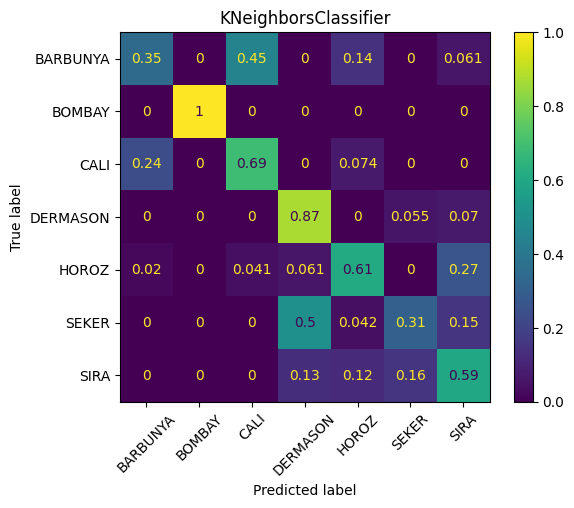

In [71]:
evaluate_model(model, X, y, labels=class_mapping)

**ANSWER CELL**

The datasplit I've chosen is to use a train test split as it gives a convenient way to split the data as it allows for a manual definition of the size of training or the testing set in relation to the entire data. [7]

I have also implemented lots of evaluation metrics to be able to analyze the model which has been used. First is a cross validation score which can split the data into multiple subsets and then trains and tests the model repeatedly then averages the results together to give an idea of the overall performance of the model not just the single state. I also have it spitting out the individual scores to see if there is a high degree of variance present. [8]

I have also used a complete smattering of different metrics which are: accuracy, f1 score (both macro and mean), precision, recall and then an f1 score per class. [9]

Having all these metrics allows for a real in-depth evaluation of the model as accuracy measures the true positives and negatives which aids evaluation of how correct the model is, the f1 score measures the true positives over the true positives, false positives and the false negatives allowing us to see how wrong the model was. The precision is just the true positives over the true and false positives while the recall is the true positives over the true positives and false negatives. These can all help massively in determining the quality of a model. A confusion matrix has also been produced to demonstrate how good the model is at identifying each class in the dataset as some will have more separation than others. [10]

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [72]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
##### replace these lines ######
#### Code  adapted from [2] ####
model_1 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
model_2 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
model_3 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
################################  https://www.geeksforgeeks.org/hyperparameter-tuning/
model_1 = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
grid_search = GridSearchCV(estimator=model_1, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
model_1 = grid_search.best_estimator_
model_2 = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300, 400]
}
grid_search = GridSearchCV(estimator=model_2, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
model_2 = grid_search.best_estimator_
model_3 = GaussianNB()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC(C=100, kernel='poly', random_state=42)
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the 

LogisticRegression(C=0.1, random_state=42, solver='liblinear')


**TESTING CELL**

Evaluating SVC model...
The raw Cross-Validation Scores are [0.65853659 0.66550523 0.68292683 0.64111498 0.66898955 0.66202091
 0.7027972  0.66083916 0.65384615 0.67482517]
The mean Cross-Validation Score is 0.6671401768962746
The accuracy score is 0.6777003484320557
The macro F1 score is 0.6226758677997728
The weighted F1 score is 0.6555332267002743
The precision scores per class are [0.45454545 1.         0.68852459 0.78571429 0.54716981 0.23684211
 0.68067227]
The recall scores per class are [0.40816327 1.         0.61764706 0.93969849 0.59183673 0.125
 0.69827586]
The F1 scores per class are [0.43010753 1.         0.65116279 0.85583524 0.56862745 0.16363636
 0.6893617 ]


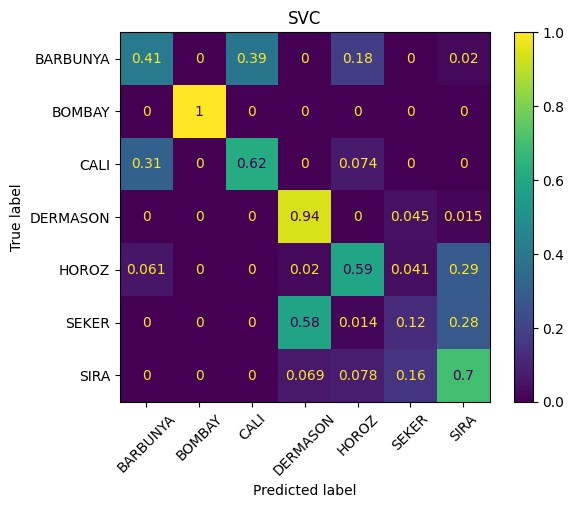


Evaluating LogisticRegression model...
The raw Cross-Validation Scores are [0.84320557 0.84320557 0.8466899  0.86759582 0.87456446 0.87804878
 0.88811189 0.84965035 0.88111888 0.87412587]
The mean Cross-Validation Score is 0.864631709753661
The accuracy score is 0.8554006968641115
The macro F1 score is 0.8665258085692942
The weighted F1 score is 0.8548909008497716
The precision scores per class are [0.90909091 1.         0.93181818 0.88425926 0.93617021 0.96875
 0.66666667]
The recall scores per class are [0.81632653 1.         0.60294118 0.95979899 0.89795918 0.86111111
 0.79310345]
The F1 scores per class are [0.86021505 1.         0.73214286 0.92048193 0.91666667 0.91176471
 0.72440945]


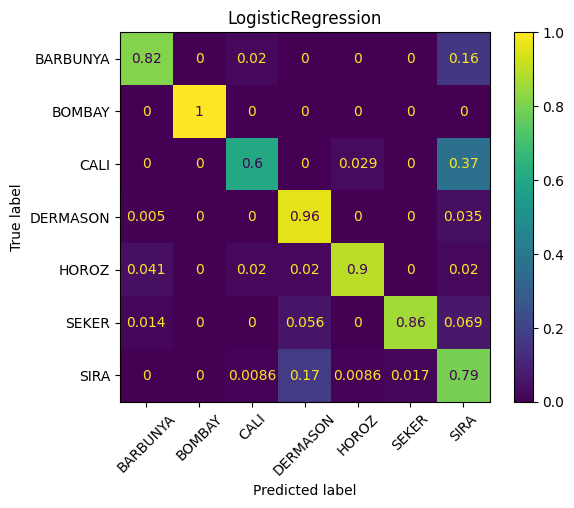


Evaluating GaussianNB model...
The raw Cross-Validation Scores are [0.74216028 0.75958188 0.81533101 0.728223   0.77351916 0.79790941
 0.75524476 0.76573427 0.7972028  0.77622378]
The mean Cross-Validation Score is 0.7711130333081553
The accuracy score is 0.7700348432055749
The macro F1 score is 0.7501987422119643
The weighted F1 score is 0.7682907934059434
The precision scores per class are [0.71428571 1.         0.69135802 0.90425532 0.65517241 0.59259259
 0.76068376]
The recall scores per class are [0.40816327 1.         0.82352941 0.85427136 0.7755102  0.66666667
 0.76724138]
The F1 scores per class are [0.51948052 1.         0.75167785 0.87855297 0.71028037 0.62745098
 0.7639485 ]


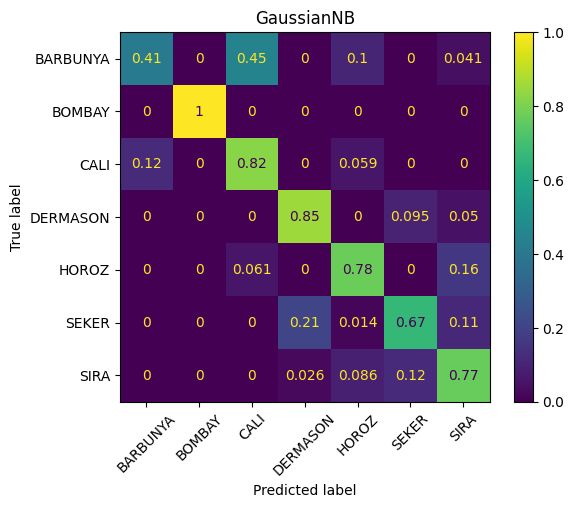

In [73]:
evaluate_model(model_1, X, y, class_mapping)
print()
evaluate_model(model_2, X, y, class_mapping)
print()
evaluate_model(model_3, X, y, class_mapping)

**ANSWER CELL**

The models that have been chosen for further testing are SVC, RandomForestClassifier and GaussianNB. For the Hyperparameter Tuning fully using GridSearchCV was considered, this was before the high resource utilisation and a Stop Error prevented this from taking place, the solution to this issue has been to cut down the parameters to reduce the number of fits as well as exclude the linear kernel for SVC as this was discovered to be taking a particularly high amount of resources and the main source of the Stop Error. [12]

I chose to use SVC as it is very effective for small to medium sized datasets, and it is effective for data with a high diamensionality which this dataset does have. Also as with so many diamensions I guessed the data was not very linearly seperable. [11]

Logistic Regression has also been chosen as it is a very simple and interpretable model which allows for easy understanding to take place. It also uses probability estimates which means that those probabilities can also be analyzed for further understanding of how it has come to it's decision. There is also built in regularization which can be used to prevent overfitting so it is better on unseen datasets. It does hit a problem of that unfortunately the model does not converge within 400 iterations [10]

GaussianNB is also being used as it contrasts with the other 2 models as it is not automatically fitted but it is an extremely fast to produce a result and it uses probabilistic information to come to it's result which when analysed will give a very interesting result as to the accuracy to the classifications. [10]

After evaluating the models Logistic Regression performed bythe best with a high Cross-Validation score and high scores in every other metric. The confusion matrix produced also shows it's immpressive performance showing it is a better model for this than the more complex SVC and GaussianNB models which had lowest scores of 0.12 and 0.41 respectively. [13]

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [ ]:
from sklearn.ensemble import BaggingClassifier

##### replace these lines ######
#### Code  adapted from [2] ####
bagged_1 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
bagged_2 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
bagged_3 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
################################ https://www.geeksforgeeks.org/hyperparameter-tuning/
bagged_1 = BaggingClassifier(estimator=model_1, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'n_jobs': [-1]
}
grid_search = GridSearchCV(estimator=bagged_1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
bagged_1 = grid_search.best_estimator_

bagged_2 = BaggingClassifier(estimator=model_2, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'n_jobs': [-1]
}
grid_search = GridSearchCV(estimator=bagged_2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
bagged_2 = grid_search.best_estimator_

bagged_3 = BaggingClassifier(estimator=model_3, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'n_jobs': [-1]
}
grid_search = GridSearchCV(estimator=bagged_3, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
bagged_3 = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


**TESTING CELL**

Evaluating BaggingClassifier model...
The raw Cross-Validation Scores are [0.65853659 0.66550523 0.68292683 0.6445993  0.66898955 0.66202091
 0.6958042  0.65734266 0.65384615 0.66783217]
The mean Cross-Validation Score is 0.6657403572037719
The accuracy score is 0.6829268292682927
The macro F1 score is 0.6291033404688059
The weighted F1 score is 0.6603887590291382
The precision scores per class are [0.48780488 1.         0.703125   0.78571429 0.54716981 0.23684211
 0.68067227]
The recall scores per class are [0.40816327 1.         0.66176471 0.93969849 0.59183673 0.125
 0.69827586]
The F1 scores per class are [0.44444444 1.         0.68181818 0.85583524 0.56862745 0.16363636
 0.6893617 ]


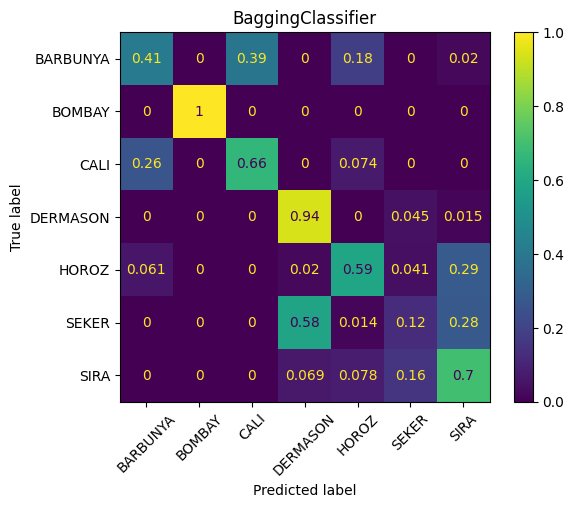


Evaluating BaggingClassifier model...
The raw Cross-Validation Scores are [0.8466899  0.84320557 0.83972125 0.87456446 0.87456446 0.86759582
 0.88111888 0.85314685 0.87762238 0.88461538]
The mean Cross-Validation Score is 0.8642844959918131
The accuracy score is 0.8588850174216028
The macro F1 score is 0.8712346097873847
The weighted F1 score is 0.8585293727607597
The precision scores per class are [0.90909091 1.         0.95454545 0.88785047 0.92       0.96875
 0.67153285]
The recall scores per class are [0.81632653 1.         0.61764706 0.95477387 0.93877551 0.86111111
 0.79310345]
The F1 scores per class are [0.86021505 1.         0.75       0.92009685 0.92929293 0.91176471
 0.72727273]


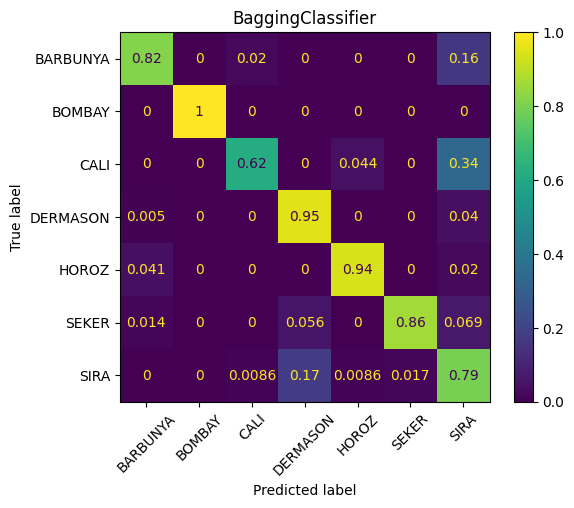


Evaluating BaggingClassifier model...
The raw Cross-Validation Scores are [0.7456446  0.75958188 0.81533101 0.728223   0.77351916 0.79442509
 0.76223776 0.76573427 0.7972028  0.77622378]
The mean Cross-Validation Score is 0.7718123340074559
The accuracy score is 0.7682926829268293
The macro F1 score is 0.7480423685311418
The weighted F1 score is 0.7667230342673871
The precision scores per class are [0.68965517 1.         0.6875     0.90425532 0.65517241 0.59259259
 0.76068376]
The recall scores per class are [0.40816327 1.         0.80882353 0.85427136 0.7755102  0.66666667
 0.76724138]
The F1 scores per class are [0.51282051 1.         0.74324324 0.87855297 0.71028037 0.62745098
 0.7639485 ]


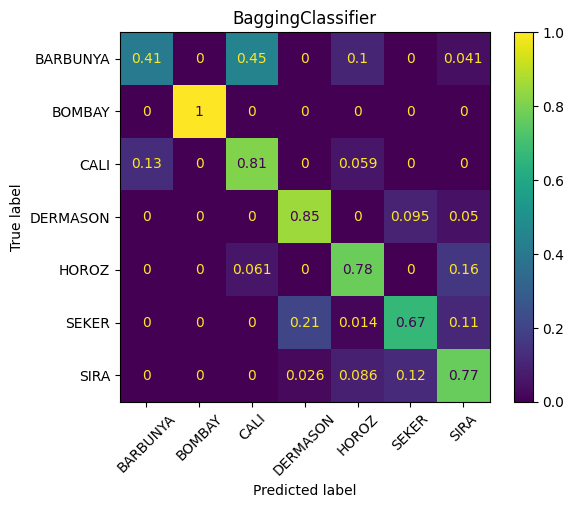


Evaluating VotingClassifier model...
The raw Cross-Validation Scores are [0.79094077 0.78745645 0.81533101 0.78745645 0.81881533 0.83972125
 0.84965035 0.8041958  0.81118881 0.8041958 ]
The mean Cross-Validation Score is 0.810895202358617
The accuracy score is 0.8083623693379791
The macro F1 score is 0.7904716436158816
The weighted F1 score is 0.8042325497125633
The precision scores per class are [0.675      1.         0.78873239 0.8630137  0.6779661  0.78333333
 0.80769231]
The recall scores per class are [0.55102041 1.         0.82352941 0.94974874 0.81632653 0.65277778
 0.72413793]
The F1 scores per class are [0.60674157 1.         0.8057554  0.90430622 0.74074074 0.71212121
 0.76363636]


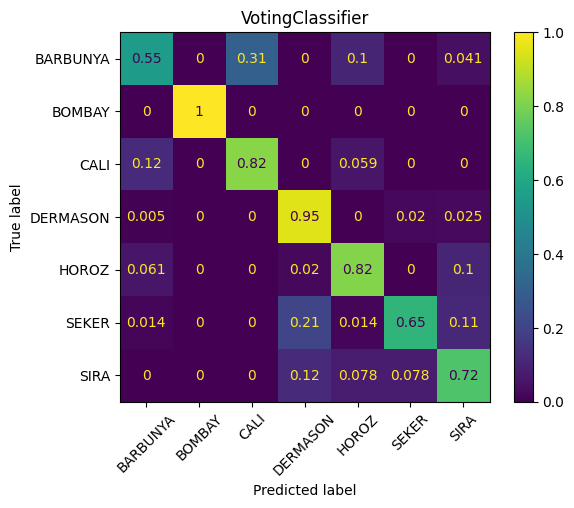


Evaluating VotingClassifier model...
The raw Cross-Validation Scores are [0.79094077 0.78397213 0.81533101 0.78745645 0.81881533 0.83623693
 0.85314685 0.80769231 0.81118881 0.8006993 ]
The mean Cross-Validation Score is 0.8105479885967689
The accuracy score is 0.8066202090592335
The macro F1 score is 0.7882722836956246
The weighted F1 score is 0.8026318433808527
The precision scores per class are [0.65853659 1.         0.78571429 0.8630137  0.6779661  0.78333333
 0.80769231]
The recall scores per class are [0.55102041 1.         0.80882353 0.94974874 0.81632653 0.65277778
 0.72413793]
The F1 scores per class are [0.6        1.         0.79710145 0.90430622 0.74074074 0.71212121
 0.76363636]


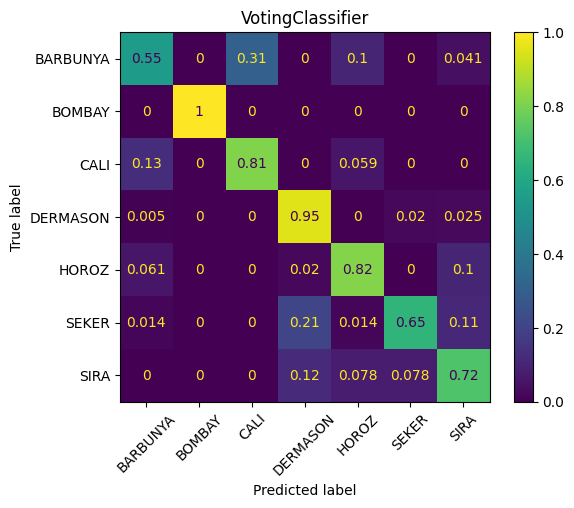

In [75]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y, class_mapping)
print()
evaluate_model(bagged_2, X, y, class_mapping)
print()
evaluate_model(bagged_3, X, y, class_mapping)
print()
evaluate_model(eclf, X, y, class_mapping)
print()
evaluate_model(ebclf, X, y, class_mapping)

**ANSWER CELL**

Bagging has effected my base models as it has reduced the variance in the result of the model which has improved the quality of the predictions that have been made. It has also improved the generalisation of the models as it trains on different subsets and then averaged the results, this is a reduction in overfitting so they have improved performance on unseen datasets like the testing data. However, it has also increased the computational costs in reaching a final solution. [14]

To choose the bagging parameters I decided to use a GridSearch again to allow automatic Hyper-parameter tuning which can repeatable and predictably produce very successful parameters for the bagging classifiers. And in this case they are under the hood of the model itself. [12]

The voting ensemble has improved the quality of the predictions as each bagging model is accurate more than half the time generally and where one model struggles to identify a type of bean the others have succeeded so the voting classifiers have improved the accuracy. This is because it has leveraged the diversity of the models present [15]. However, they have incurred higher computational costs in achieving this result, but the size of the dataset has meant that these higher computational costs are not a drag on the system itself. [16]

Although they have suffered from the poor nature of 2 of the models to leave neither of them to be the single best model at this classification. They are better than bagging models 1 and 3 which are based on SVM and GaussianNB but not better than bagged Logistic Regression despite Logistic Regression not converging fully with the chosen parameters. [15]

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

Evaluating BaggingClassifier model...
The raw Cross-Validation Scores are [0.8466899  0.84320557 0.83972125 0.87456446 0.87456446 0.86759582
 0.88111888 0.85314685 0.87762238 0.88461538]
The mean Cross-Validation Score is 0.8642844959918131
The accuracy score is 0.8588850174216028
The macro F1 score is 0.8712346097873847
The weighted F1 score is 0.8585293727607597
The precision scores per class are [0.90909091 1.         0.95454545 0.88785047 0.92       0.96875
 0.67153285]
The recall scores per class are [0.81632653 1.         0.61764706 0.95477387 0.93877551 0.86111111
 0.79310345]
The F1 scores per class are [0.86021505 1.         0.75       0.92009685 0.92929293 0.91176471
 0.72727273]


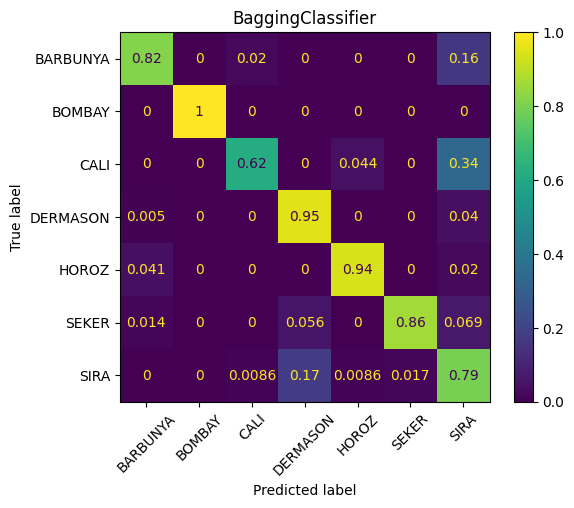

In [76]:
evaluate_model(bagged_2, X, y, class_mapping)

**ANSWER CELL**

The single best model presented above I believe to be the Bagged Logistic Regression model. This is primarily because it has the highest Mean Cross-Validation score at 0.8643 when ten folds have been used which little variance between the result in each fold [17]. This demonstrates that it is consistent and has a stability within the model which makes it ideal for unseen data. [14]

The evaluation shows it also has a relatively high accuracy score of 0.8589 which is showing it predicts the correct class in most instances. High Macro and Weighted F1 scores also show the balanced performance of the model not falling behind really on any class. This is despite the low precision for the class Sira of 0.6715 showing it classified other beans incorrectly as Sira [9]. This can also be borne out of the recall with the class of Cali which was 0.6176 demonstrating it wrongly classified Cali as Sira to a larger degree. [18]

In an overall summary it is a very stable model due to the bagging that has taken place on top of the base model however, that bagging on top of a large section of incorrect predicitons has baked in the incorrect predictions so further optimization would be needed of both the bagged model and the base model to improve this. This improvement would probably be achieved by using a higher number of maximum iterations within the base Logistic Regression model [17].

## References

[1] Koklu, M. and Ozkan, I.A., 2020. Multiclass classification of dry beans using computer vision and machine learning techniques. _Computers and Electronics in Agriculture_, 174, p.105507.

[2] Murat Koklu: Dry Bean Dataset https://www.muratkoklu.com/datasets/ (accessed 14/08/2024)

[3] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[4] Pazoki, A.R., Farokhi, F. and Pazoki, Z., 2014. Classification of rice grain varieties using two artificial neural networks (MLP and neuro-fuzzy).

[5] Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory.

[6] Duda, R. O., Hart, P. E., & Stork, D. G. (2000). Pattern Classification. Wiley-Interscience.

[7] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

[8] Kohavi, R. (1995). A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection. In Proceedings of the 14th International Joint Conference on Artificial Intelligence (IJCAI).

[9] Sokolova, M., & Lapalme, G. (2009). A systematic analysis of performance measures for classification tasks. Information Processing & Management, 45(4), 427–437.

[10] Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.

[11] Schölkopf, B., & Smola, A. J. (2002). Learning with Kernels. MIT Press.

[12] Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

[13] Caruana, R., & Niculescu-Mizil, A. (2006). An Empirical Comparison of Supervised Learning Algorithms. In Proceedings of the 23rd International Conference on Machine Learning (ICML 2006).

[14] Breiman, L. (1996). "Bagging Predictors." Machine Learning, 24(2), 123-140.

[15] Dietterich, T. G. (2000). "Ensemble Methods in Machine Learning." Multiple Classifier Systems, 1-15.

[16] Zhang, J., & Ma, H. (2015). "Comparative Study of Bagging and Boosting Algorithms." Proceedings of the 2015 International Conference on Machine Learning and Cybernetics, 1-6.

[17] James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An Introduction to Statistical Learning: with Applications in R."

[18] Buhlmann, P., & Yu, B. (2002). "Analyzing Bagging." The Annals of Statistics, 30(4), 927-961.